Index(['nut_no3_n', 'sln_cde', 'lon', 'wtr_trn', 'wtr_tmp', 'nut_no2_n',
       'gru_nam', 'res_vsl_nm', 'nut_sio2_si', 'wtr_dep', 'dox', 'sta_cde',
       'qc_wtr', 'qc_sal', 'obs_dtm', 'sal', 'atm', 'nut_ph', 'qc_dox',
       'nut_po4_p', 'lat'],
      dtype='object')
soo_list_208.csv saved successfully.
soo_list_208.csv saved successfully.


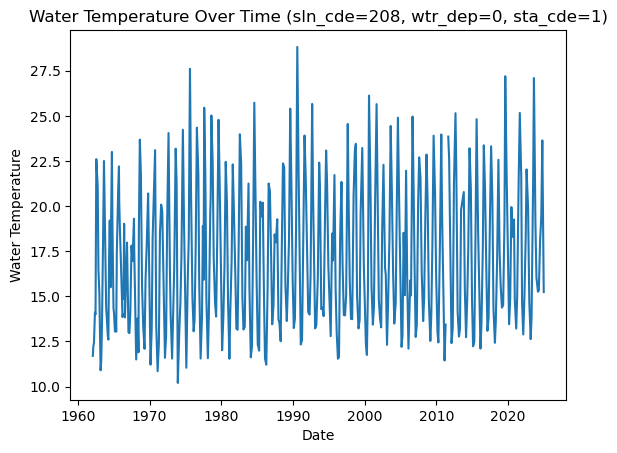

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

def load_and_filter_data(start_year=1962, end_year=2024, sln_cde_value=208):
    df = pd.DataFrame()
    for year in range(start_year, end_year + 1):
        fname = Path.cwd() / "data" / "sooList" / f"soo_list_{year}.json"
        with open(fname, "r", encoding="utf-8") as f:
            df_temp = pd.read_json(fname, encoding="utf-8")
            df = pd.concat([df, df_temp[df_temp["sln_cde"] == sln_cde_value]])
    df.reset_index(drop=True, inplace=True)
    return df

def save_filtered_data(df, filename):
    df.to_csv(filename, index=False, encoding="utf-8")
    print(f"{filename.name} saved successfully.")

def plot_water_temperature(df):
    # Convert obs_dtm to datetime
    df["obs_dtm"] = pd.to_datetime(df["obs_dtm"], format="%Y-%m-%d %H:%M", errors="coerce")
    # Filter for wtr_dep == 0 and sta_cde == 1
    mask = (df["wtr_dep"] == 0) & (df["sta_cde"] == 1)
    t = df.loc[mask, "obs_dtm"]
    value = df.loc[mask, "wtr_tmp"]
    # Zip and sort by datetime
    zipped = list(zip(t, value))
    zipped = [z for z in zipped if pd.notnull(z[0])]
    zipped.sort(key=lambda x: x[0])
    if zipped:
        dates, values = zip(*zipped)
        plt.plot(dates, values)
        plt.xlabel("Date")
        plt.ylabel("Water Temperature")
        plt.title("Water Temperature Over Time (sln_cde=208, wtr_dep=0, sta_cde=1)")
        plt.show()
    else:
        print("No data to plot.")

def main():
    df208 = load_and_filter_data()
    print(df208.columns)
    save_filtered_data(df208, Path.cwd() / "data" / "sooList" / "soo_list_208.csv")
    plot_water_temperature(df208)

main()
